In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [11]:
from monty.serialization import loadfn, dumpfn
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
supercell_size = 10.1

In [4]:
MODEL = "uma"

In [43]:
complete_energies = loadfn(f'../../data/{MODEL}/relaxed_cp_defect_tm.json')

In [34]:
for key in complete_energies.keys():
    dopant = complete_energies[key]['dopant']
    metal = complete_energies[key]['metal']
    complete_energies[key]['defect formation energy'] = {}
    defect_supercell_e = complete_energies[key]['minimum energy site']['energy']
    supercell_e = complete_energies[key]['defect-bulk-supercells']['supercell']['energy'] # pristine supercell
    formation_energy = {}
    for key1 in complete_energies[key]['competing phases']['chemical potentials']['limits'].keys():
        defect_energy = defect_supercell_e + complete_energies[key]['competing phases']['chemical potentials']['limits'][key1][metal] - supercell_e - complete_energies[key]['competing phases']['chemical potentials']['limits'][key1][dopant]
        formation_energy[key1] = defect_energy
    complete_energies[key]['defect formation energy'] = formation_energy

In [35]:
dumpfn(complete_energies, f'../../data/{MODEL}/calc_defect_energies.json')

In [44]:
complete_energies = loadfn(f'../../data/{MODEL}/calc_defect_energies.json')

In [60]:
for key in complete_energies.keys():
    pretty = json.dumps(complete_energies[key]['defect formation energy'], indent=1)
    print(pretty)

{
 "AlClO-Cl2-Al2O3-VCl5": 3.831551663110547,
 "AlClO-AlCl3-Cl2-VCl5": 3.900771663110577,
 "AlClO-Al-Al2O3-Al3V": 4.839951663110552,
 "AlClO-AlCl3-Al-Al3V": 4.839951663110552
}
{
 "AlClO-Cl2-Al2O3-CrCl3": 2.918089663419172,
 "AlClO-AlCl3-Cl2-CrCl3": 2.987309663419202,
 "AlClO-Al-Al2O3-Al45Cr7": 5.337279663419176,
 "AlClO-AlCl3-Al-Al45Cr7": 5.337279663419176
}
{
 "MgH2Cl2O-MgCl2-MgO-H2-Mn": 1.6532336728807504,
 "MgH2Cl2O-H3ClO-MgCl2-H2-Mn": 0.4297536728807554,
 "MgH2Cl2O-H3ClO-MgCl2-Cl2-MnH2Cl2O": 0.06581367288076123,
 "MgH2Cl2O-MgCl2-Cl2-ClO2-MnH2Cl2O": 0.06581367288076123,
 "Mg(HO)2-MgH2Cl2O-MgO-H2-Mn": 1.6043236728807724,
 "MgH4(ClO4)2-MgH2Cl2O-MgCl2-ClO2-MnH2Cl2O": 0.06582367288074131,
 "MgH4(ClO4)2-MgH2Cl2O-MgCl2-MgO-Mg6MnO8": 1.2174736728807591,
 "MgH4(ClO4)2-Mg(HO)2-MgH2Cl2O-MgO-Mg6MnO8": 1.2093136728807288,
 "MgH4(ClO)2-Mg(HO)2-MgH2Cl2O-H2-Mn": 1.5469936728807365,
 "MgH4(ClO)2-MgH2Cl2O-H3ClO-H2-Mn": 0.5073536728807735,
 "MgH4(ClO)2-MgH4(ClO4)2-Mg(HO)2-MgH2Cl2O-Mg6MnO8": 1.003853

In [50]:
mfe = []
compounds = []
sorted_keys = sorted(complete_energies.keys())

for key in sorted_keys:
    val = complete_energies[key]
    compounds.append(f"{val['formula']}+{val['dopant']}")
    min_key = min(val['defect formation energy'], key=val['defect formation energy'].get)
    min_value = val['defect formation energy'][min_key]
    mfe.append(min_value)

In [54]:
num_elements = len(compounds)
chunk_size = num_elements // 3

# Split the compounds list
compounds1 = compounds[:chunk_size]
compounds2 = compounds[chunk_size:2 * chunk_size]
compounds3 = compounds[2 * chunk_size:]

# Split the mfe list
mfe1 = mfe[:chunk_size]
mfe2 = mfe[chunk_size:2 * chunk_size]
mfe3 = mfe[2 * chunk_size:]

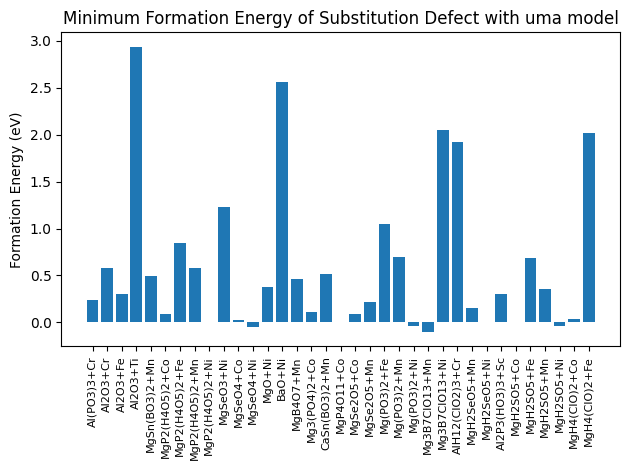

In [56]:
fig, ax = plt.subplots()
bars = ax.bar(compounds1, mfe1)  # Assuming you have these lists already

# Add labels on top of each bar
ax.set_title(f"Minimum Formation Energy of Substitution Defect with {MODEL} model")
ax.set_ylabel("Formation Energy (eV)")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.savefig(f"../../figures/{MODEL}/calc_formation_energy_1.png", dpi=300, bbox_inches='tight')
plt.show()

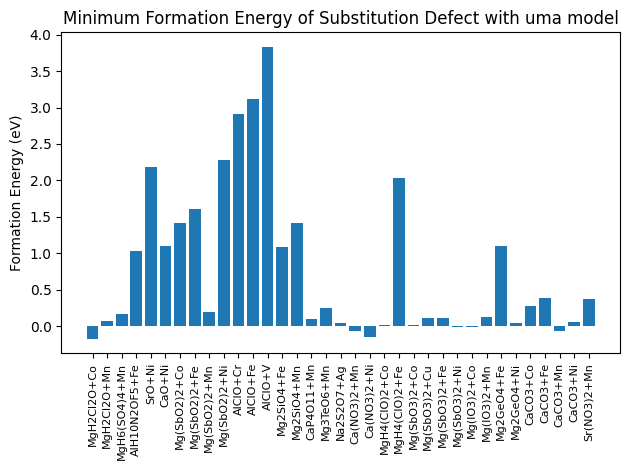

In [57]:
fig, ax = plt.subplots()
bars = ax.bar(compounds2, mfe2)  # Assuming you have these lists already

# Add labels on top of each bar
ax.set_title(f"Minimum Formation Energy of Substitution Defect with {MODEL} model")
ax.set_ylabel("Formation Energy (eV)")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.savefig(f"../../figures/{MODEL}/calc_formation_energy_2.png", dpi=300, bbox_inches='tight')
plt.show()

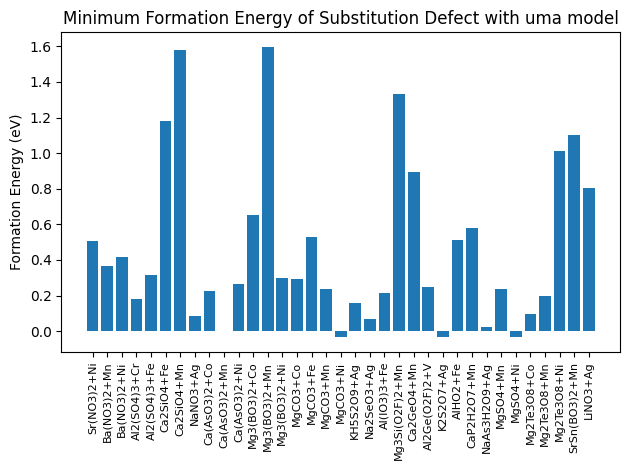

In [59]:
fig, ax = plt.subplots()
bars = ax.bar(compounds3, mfe3)  # Assuming you have these lists already

# Add labels on top of each bar
ax.set_title(f"Minimum Formation Energy of Substitution Defect with {MODEL} model")
ax.set_ylabel("Formation Energy (eV)")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.savefig(f"../../figures/{MODEL}/calc_formation_energy_3.png", dpi=300, bbox_inches='tight')
plt.show()